In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA

In [108]:
import os
os.environ["OMP_NUM_THREADS"] = "2"


In [112]:
df=pd.read_csv("data_student.csv")
df.head(20)


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [ ]:
df.groupby(" UNS").mean()
#'''              STG       SCG       STR       LPR       PEG
#Cluster                                                  
#0        0.247861  0.223250  0.324861  0.453472  0.215278   low      low    low    middle   low ==>low
#1        0.390367  0.375317  0.507375  0.264083  0.645025   middle   middle  high   low     high ==>middle
#2        0.455394  0.464424  0.552576  0.716667  0.384848'''high      high   middle  high    middle ==>high

,STG,SCG,STR,LPR,PEG
UNS,,,,,
High,0.421651,0.423190,0.501667,0.501270,0.772540
Low,0.321145,0.337000,0.430723,0.497349,0.237627
Middle,0.399977,0.367920,0.506818,0.342841,0.542386
very_low,0.305792,0.198125,0.366250,0.358750,0.090833


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [ ]:
df.shape

(258, 6)

In [ ]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [ ]:
df[" UNS"].value_counts(normalize=True)

 UNS
Middle      0.341085
Low         0.321705
High        0.244186
very_low    0.093023
Name: proportion, dtype: float64

In [ ]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [ ]:
label=LabelEncoder()
df[" UNS"]=label.fit_transform(df[" UNS"])

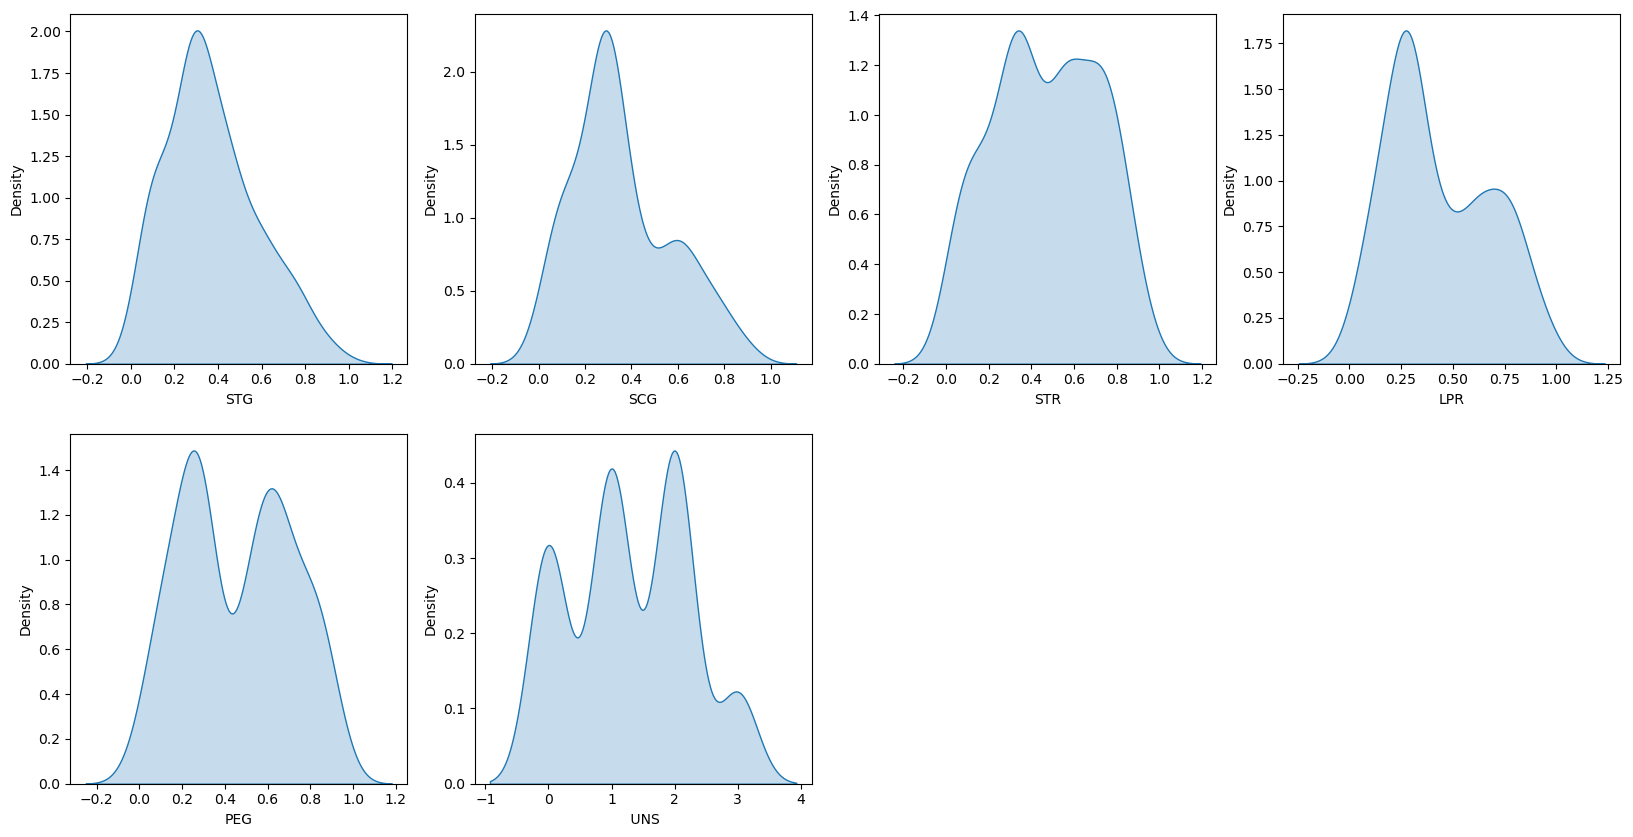

In [ ]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True)
plt.show()

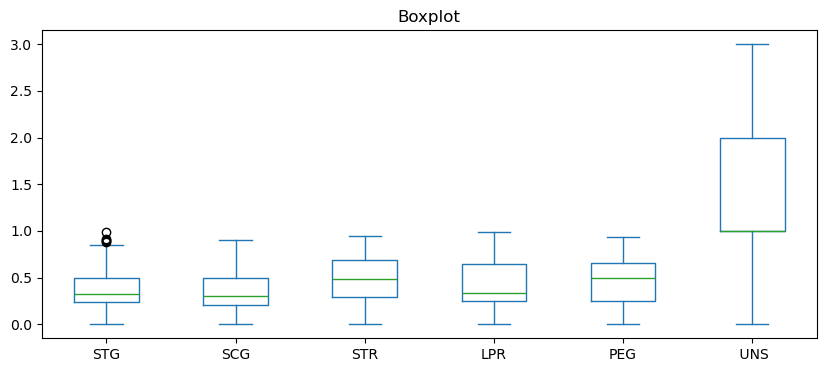

In [ ]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.show()

In [ ]:
Q1 = np.percentile(df["STG"], 25)
Q3 = np.percentile(df["STG"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[(df["STG"] < lower_bound) | (df["STG"] > upper_bound), "STG"] = np.nan

df["STG"] = df["STG"].fillna(method="bfill")


C:\Users\ganesh\AppData\Local\Temp\ipykernel_13600\4193458921.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["STG"] = df["STG"].fillna(method="bfill")


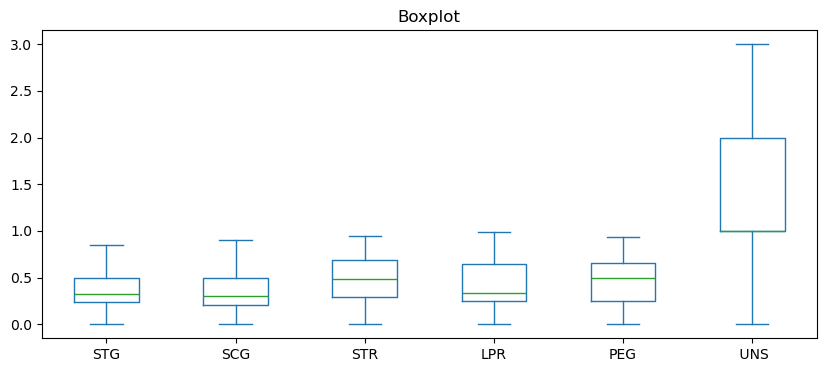

In [ ]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.show()

<Axes: >

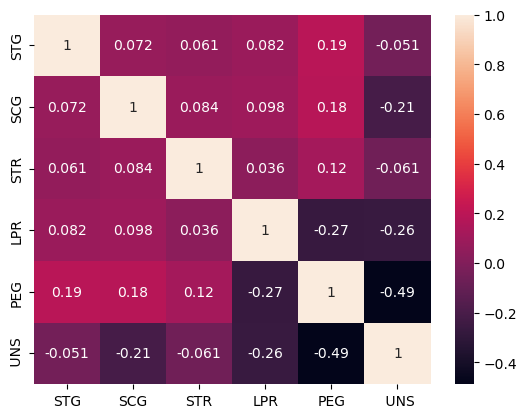

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(df.drop(columns=[" UNS"]))

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

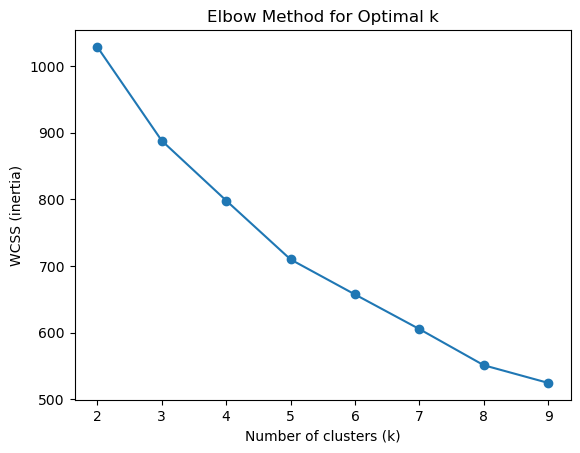

In [ ]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

In [ ]:
print(pca.components_)

[[ 0.41443961  0.41431064  0.34753373 -0.25406318  0.68648286]
 [ 0.31319281  0.38917653  0.2601017   0.78229354 -0.26611241]]


In [ ]:
best_score = -1
best_k_value = None
all_scores = [] 
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    all_scores.append([k, score])
    if score > best_score:
        best_score = score
        best_k_value = k
res = pd.DataFrame(all_scores, columns=["K value", "Silhouette Score"])
print(res)
print(f"\nBest k = {best_k_value} with silhouette = {best_score:.4f}")

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

   K value  Silhouette Score
0        2          0.382638
1        3          0.397031
2        4          0.371102
3        5          0.357287
4        6          0.363706
5        7          0.386173
6        8          0.384481
7        9          0.368749
8       10          0.386328

Best k = 3 with silhouette = 0.3970


In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42,n_init=50,)
res=[]
y_cluster=kmeans.fit_predict(X_pca)
kmeanssilhouette = silhouette_score(X_pca, y_cluster)
kmeansdb_index = davies_bouldin_score(X_pca, y_cluster)
kmeans_ch = calinski_harabasz_score(X_pca, y_cluster)
res.append([kmeanssilhouette,kmeansdb_index,kmeans_ch,kmeans.inertia_])
print("Silhouette Score:", kmeanssilhouette)
print("Davies-Bouldin Index:", kmeansdb_index)
print("calinski_harabasz_score:",kmeans_ch)
df["Cluster"]=y_cluster
cluster_profiles = df.groupby("Cluster")[["STG", "SCG", "STR", "LPR", "PEG"]].mean()
print(cluster_profiles)


c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.39703121377257655
Davies-Bouldin Index: 0.8317389670752694
calinski_harabasz_score: 191.1994690912111
              STG       SCG       STR       LPR       PEG
Cluster                                                  
0        0.247861  0.223250  0.324861  0.453472  0.215278
1        0.390367  0.375317  0.507375  0.264083  0.645025
2        0.455394  0.464424  0.552576  0.716667  0.384848


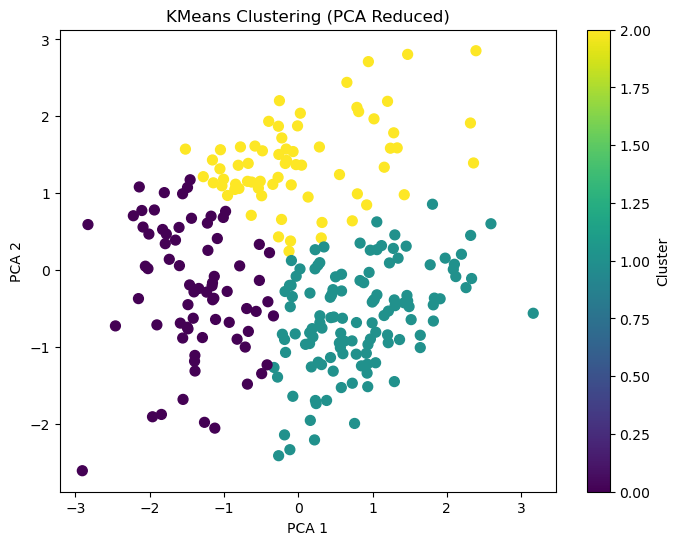

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_cluster, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
'''import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_cluster
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()
'''

'import plotly.express as px\nimport pandas as pd\ndf_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])\ndf_pca["Cluster"] = y_cluster\nfig = px.scatter_3d(\n    df_pca,\n    x="PCA1", y="PCA2", z="PCA3",\n    color="Cluster", \n    title="3D Cluster Plot (Interactive with Plotly)",\n)\nfig.show()\n'

<Figure size 800x500 with 0 Axes>

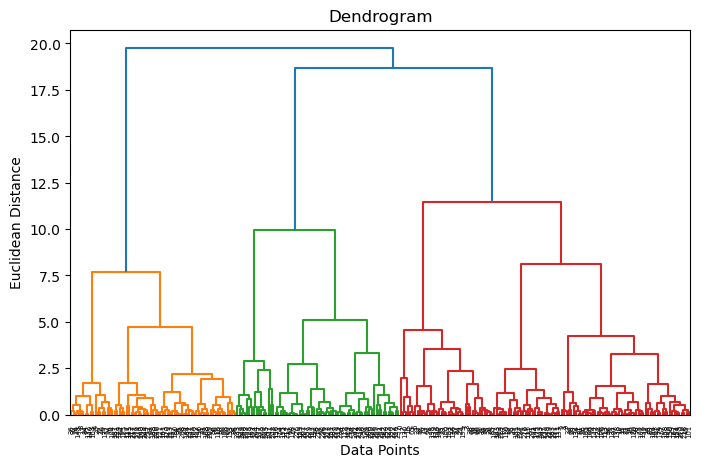

In [ ]:

plt.figure(figsize=(8, 5))
dendrogram =plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show() 

In [ ]:
best_score = -1
best_k_value = None
linkages = ["ward", "complete"]
linkage="null"
for link in linkages:
    for k in range(2, 5):
        hc = AgglomerativeClustering(n_clusters=k, linkage=link)
        labels = hc.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        print(f"linkage={link}, k={k}, silhouette={score:.4f}")
        if score > best_score:
            best_score = score
            best_k_value = k
            linkage=link
print(f"\nBest k = {best_k_value} with silhouette = {best_score:.4f} with linkage={linkage}")


linkage=ward, k=2, silhouette=0.3198
linkage=ward, k=3, silhouette=0.3349
linkage=ward, k=4, silhouette=0.3210
linkage=complete, k=2, silhouette=0.3144
linkage=complete, k=3, silhouette=0.1960
linkage=complete, k=4, silhouette=0.3344

Best k = 3 with silhouette = 0.3349 with linkage=ward


Silhouette Score: 0.3348902717533459
Davies-Bouldin Index: 0.967289057228984
calinski_harabasz_score: 160.5466465341838


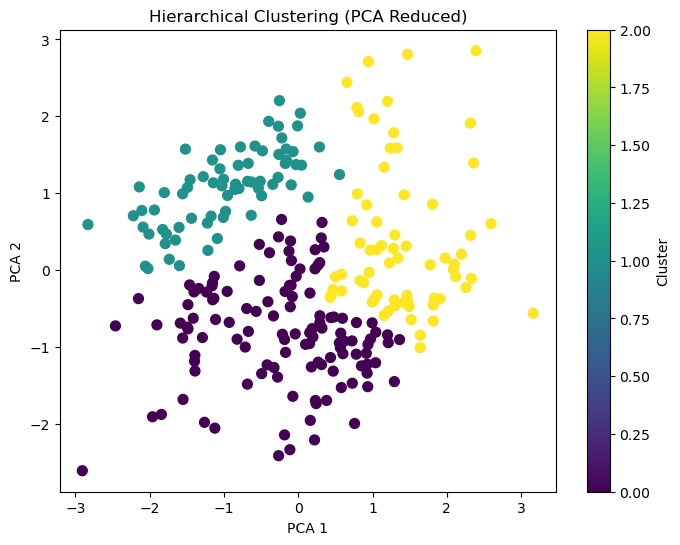

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_pca)
hcsilhouette = silhouette_score(X_pca, y_hc)
hcdb_index = davies_bouldin_score(X_pca, y_hc)
hc_ch = calinski_harabasz_score(X_pca, y_hc)
res.append([hcsilhouette,hcdb_index,hc_ch,np.nan])
print("Silhouette Score:", hcsilhouette)
print("Davies-Bouldin Index:", hcdb_index)
print("calinski_harabasz_score:",hc_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
'''import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_hc
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()'''


'import plotly.express as px\nimport pandas as pd\ndf_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])\ndf_pca["Cluster"] = y_hc\nfig = px.scatter_3d(\n    df_pca,\n    x="PCA1", y="PCA2", z="PCA3",\n    color="Cluster", \n    title="3D Cluster Plot (Interactive with Plotly)",\n)\nfig.show()'

In [ ]:
best_score = -1
best_params = None
for eps in np.arange(0.1, 0.4, 0.25):
    for min_samples in [2,3,4,5]:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
        labels = db.labels_
        if len(set(labels)) <= 1 or set(labels) == {-1}:
            continue
        score = silhouette_score(X_pca, labels)
        print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette={score:.4f}")
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)
print(f"\nBest DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]}, silhouette={best_score:.4f}")


eps=0.10, min_samples=2, silhouette=-0.2585
eps=0.10, min_samples=3, silhouette=-0.4390
eps=0.10, min_samples=4, silhouette=-0.1535
eps=0.35, min_samples=2, silhouette=-0.0373
eps=0.35, min_samples=3, silhouette=-0.0065
eps=0.35, min_samples=4, silhouette=0.0761
eps=0.35, min_samples=5, silhouette=-0.0791

Best DBSCAN params: eps=0.35, min_samples=4, silhouette=0.0761


In [ ]:
dbscan = DBSCAN(eps=0.35, min_samples=4)
y_db = dbscan.fit_predict(X_pca)
y_db_mapped = np.array([
    "Outlier" if label == -1 else f"Cluster {label+1}" for label in y_db
])
if len(set(y_db)) > 1 and not set(y_db) == {-1}:
    db_sil = silhouette_score(X_pca, y_db)
    db_db = davies_bouldin_score(X_pca, y_db)
    db_ch = calinski_harabasz_score(X_pca, y_db)
else:
    db_sil, db_db, db_ch = np.nan, np.nan, np.nan
res.append([db_sil,db_db,db_ch,np.nan])
print(f"\nSilhouette Score: {db_sil:.4f}")
print(f"Davies-Bouldin Index: {db_db:.4f}")
print(f"Calinski-Harabasz Score: {db_ch:.4f}")


Silhouette Score: 0.0761
Davies-Bouldin Index: 10.4564
Calinski-Harabasz Score: 12.0291


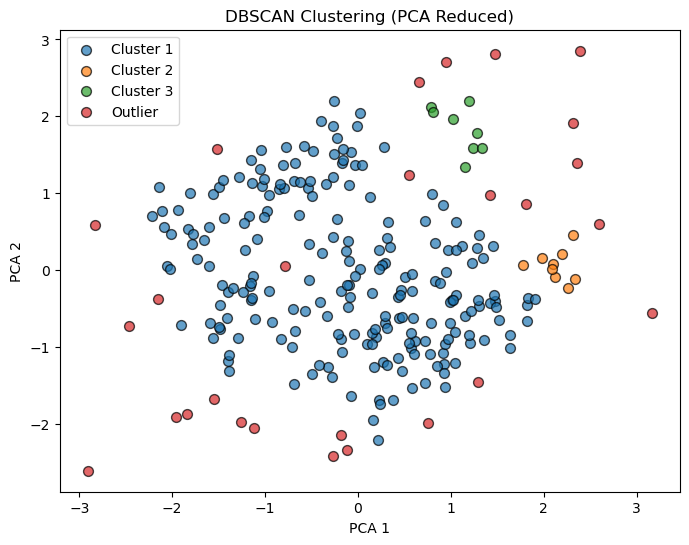

In [ ]:
plt.figure(figsize=(8,6))
unique_labels = np.unique(y_db_mapped)
colors = plt.cm.tab10.colors
for i, label in enumerate(unique_labels):
    mask = y_db_mapped == label
    color = colors[i % 10] if label != "Outlier" else (0.6,0.6,0.6)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, s=50, edgecolors='k', alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.legend()
plt.show()

In [ ]:
dfs = pd.DataFrame(res, columns=["silhouette score", "davis_bouldin_score", "calinski_harabasz_score", "inertia"])
dfs.index = ["Kmean","hierechical","DBscan"]
dfs

,silhouette score,davis_bouldin_score,calinski_harabasz_score,inertia
Kmean,0.397031,0.831739,191.199469,265.301682
hierechical,0.334890,0.967289,160.546647,NaN
DBscan,0.076114,10.456369,12.029098,NaN


In [ ]:
import joblib

# Save your trained models and scaler
joblib.dump(kmeans, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']